
<img src="Images/NumPy_logo.png" width="400">

# Programming for Data Analysis Assignment

## numpy.random package
***

**Assignment objectives:**

1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions. 
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

## 1. NumPy and random number generators
***

NumPy, stands for Numerical Python "is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more." [numpy.org](https://numpy.org/devdocs/user/whatisnumpy.html)

NumPy was created in 2005 by Travis Oliphant who incorporating features of the Numarray into Numeric, with extensive modifications. NumPy is open-source software and has many contributors. [Wikipedia](https://en.wikipedia.org/wiki/NumPy)

**`numpy.random`** is a module within the NumPy package which is used to generate pseudo-random values and provides a range of tools to  manipulate them. This module is similar to the Python standard library random but it works with numpy arrays.  It allows to create arrays of random numbers from various probability distributions and also randomly sample from arrays or lists. This module is frequently used to fake or simulate data which is an important tool in data analysis, scientific research, machine learning and multiple other areas. The simulated data becomes very handy as it can be used to test methods before applying them to the real data.

Python's standard library random  only samples one value at a time while numpy.random can efficiently generate arrays of sample values from various probability distributions and provides additional probability distributions to use. Numpy's random module is much faster and more efficient than the standard Python’s random library particularly when working with lots of samples, however for other simpler purposes the random module can be sufficient and even more efficient.

As computers cannot generate truly random numbers - they need a set of instructions to produce an output, that means they are predictable and reproducible which is beneficial when creating and testing code. Therefore both of the random modules can only produce what is called  pseudorandom numbers that may appear random but they are not truly so.

“Random number generators have applications in gambling, statistical sampling, computer simulation, cryptography, completely randomized design, and other areas where producing an unpredictable result is desirable.” Monte Carlo simulation uses random numbers to simulate real world problems. They are often used to assess the risk of a given trading strategy for options or stocks. A Monte Carlo simulator allow to visualize most of the potential outcomes which gives a much better idea regarding the risk of a decision. They are also used in cryptography – so long as the seed is secret. Sender and receiver can generate the same set of numbers automatically to use as keys.

In Machine learning random sampling  is often used an actual datasets for testing and evaluation analytical methods and algorithms. “Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.”  The machine learning algorithms in the scikit-learn package use numpy.random in the background. 
[scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

“Numpy’s random number routines produce pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions” [Random sampling]( https://numpy.org/doc/stable/reference/random/index.html)

Let's create an instance of a generator using `numpy.random` package. But before we proceed, we need to do all the necessary imports first:


In [1]:
# importing NumPy module
import numpy as np

# for data analysis
import pandas as pd

# importing matplotlib and seaborn for plotting and visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# We can create a new constructor using the default_rng method to get a new instance of a random number generator.
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7F7A9A3007C0

"PCG is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict." [pcg-random.org](https://www.pcg-random.org/index.html)

## 2.1 Simple random data
***

There are four methods in Simple random data which we going to explore below: **random, integers, choice** and **bytes.**

It is very easy to create a random number(s) using `numpy.random`. As a first example, let's create 5 random float numbers between 0 and 1 by using the instance of a random number generator which we have created above.

<span style="color:Blue; font-weight:bold;">random</span>([size, dtype, out]) returns random floats in the half-open interval [0.0, 1.0).

In [2]:
# returns an array of 5 floats (if no parameters are specified, returns just one number).
rng.random(5)

array([0.35748102, 0.98546531, 0.6108642 , 0.34484141, 0.89676856])

In [3]:
# returns an array of 2x3 floats
rng.random((2,3))

array([[0.75777845, 0.0437079 , 0.12054788],
       [0.14685959, 0.3656197 , 0.50117761]])

In [4]:
# Three-by-two array of random numbers from [-3, 0):
3 * rng.random((3, 2)) - 3

array([[-0.00468022, -2.33186807],
       [-2.20851544, -1.79381923],
       [-0.41248179, -0.63764632]])

<span style="color:Blue; font-weight:bold;">integers</span>(low[, high, size, dtype, endpoint])) returns random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive).

In [5]:
# returns an integer between 0-9
rng.integers(10)

1

In [6]:
# returns an array of 10 numbers between 5-8
rng.integers(5, 8, 10)

array([6, 7, 7, 7, 7, 7, 5, 5, 6, 6])

<span style="color:Blue; font-weight:bold;">bytes</span>(length) returns random bytes. The length of the string to be returned must be provided to the numpy.random.bytes function.

In [7]:
# returns 10 random bytes
rng.bytes(10)

b'\xdbz\xc8\x19\xab>Cu,\xc3'

<span style="color:Blue; font-weight:bold;">choice</span>(a[, size, replace, p, axis, shuffle]) gmenerates a random sample from a given array. 

In [8]:
# choose 5 numbers at random from the range 0-19
rng.choice(20, 5)

array([ 2, 19,  2, 12,  1])

We can use **choice()** methods with other data types, for example strings

In [9]:
# create a list of strings
colors = ["green", "red", "blue", "orange", "white"]

# choose 2 items from the list
rng.choice(colors, size=2)

array(['white', 'white'], dtype='<U6')

We can 'weight' the probability for each item in the list. In the example below the 5th and and the 3d items in the list are respectivle 5 times and 2 times more likely to be returned than the others.

In [10]:
rng.choice(colors, p=[0.1, 0.2, 0.1, 0.1, 0.5], size=6)

array(['white', 'white', 'white', 'white', 'white', 'red'], dtype='<U6')

## 2.2 Permutations
***

There are three permutations methods in the numpy.random package.

- <span style="color:Blue; font-weight:bold;">shuffle</span>(x[, axis]) is used to modify an array or sequence in-place by shuffling its contents.
- <span style="color:Blue; font-weight:bold;">permutation</span>(x[, axis]) is used to randomly permute a sequence, or return a permuted range.
- <span style="color:Blue; font-weight:bold;">permuted</span>(x[, axis, out]) is used to randomly permute x along axis *axis*.

These methods can be used to (re)arrange series of numbers or to change the order of samples in a sequence. In machine learning these functions are often used to separate a dataset into training and test sets. Permutation method can be used to shuffled multi-dimensional arrays. When shuffling rows of data it is usually important to keep the contents of the row together while the order of the rows will be moved about.
The main difference between "permutation" and  "shuffle" is that first one creates a new array while the other one alters the original array.

To get a better understanding of how it works, let's look at some examples below:

In [11]:
# creating an array of numbers 0 to 10
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# 'shuffles' the array, the original array is now altered
rng.shuffle(arr1)
arr1

array([9, 5, 2, 8, 1, 0, 4, 3, 6, 7])

In [13]:
arr2 = np.arange(2,41,2).reshape(4,5)   ## create a 4 by 5 two-dimensional array
arr2

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

In [14]:
# shuffles the 2D array within rows only
rng.shuffle(arr2, axis=1)
arr2

array([[ 4,  8,  6, 10,  2],
       [14, 18, 16, 20, 12],
       [24, 28, 26, 30, 22],
       [34, 38, 36, 40, 32]])

Now let's look at permutation method when used on the same arrays

In [15]:
# creating an array of numbers 0 to 10
arr3 = np.arange(10)
arr3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
# random permutation
rng.permutation(arr3)

array([5, 4, 6, 2, 0, 8, 3, 7, 9, 1])

In [17]:
# the original array is intact
arr3

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
arr4 = np.arange(2,41,2).reshape(4,5)   ## create a 4 by 5 two-dimensional array
arr4

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

In [19]:
# permutates the 2D array - rows only
rng.permutation(arr4)

array([[ 2,  4,  6,  8, 10],
       [32, 34, 36, 38, 40],
       [22, 24, 26, 28, 30],
       [12, 14, 16, 18, 20]])

In [20]:
# permutates 'colums' in the 2D array
rng.permutation(arr4, axis=1)

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

In [21]:
# just to confirm, the original array is intact
arr4

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20],
       [22, 24, 26, 28, 30],
       [32, 34, 36, 38, 40]])

If we use **permuted** method on the same array, we can notice that each slice along the given axis is shuffled independently of the others.

In [22]:
#rng.permuted(arr4, axis=1)

We can also use permutation to create a random array from a range

In [23]:
# creates a permutation of the numbers 0-49
print(rng.permutation(50))

[ 9 41 14 24 20 25 36 49 31  4  3 46  0 17 42 30 34  8 26 35 23 37  5 12
  7 10 44  1 47 39 43 18  6 22 11 21 33 48 32 19 29 27 45 40 38 13 15 16
 28  2]


## 3. Probability Distribution
***

A probability distribution is a statistical function that describes all the possible values and likelihoods that a random variable can take within a given range. There are many different patterns of probability and random numbers can be drawn from various probability distributions.

Probability distributions are of two types:
1. Discrete Probability Distribution
2. Continuous Probability Distribution or Probability Density Function

A discrete random variable is one where its set of possible values is a collection of isolated points on the number line - it has a finite set of specific outcomes, while a continuous random variable is one where its set of possible values is an entire interval on the number line. Discrete random variables almost always come from counting while continuous random variables mostly come from measurement.

Probability distributions are used widely in data analytics, statistical analysis and machine learning. They can be simulated based on their mathematical properties. Probability distributions are derived from variance or uncertainty and show which outcomes are more likely and which are less likely.

There is a very long list of various probability distribution which can be found on [Wikipedia](https://en.wikipedia.org/wiki/List_of_probability_distributions). In this project we going to have a look at a five of most commonly used ones as example. 

## 3.1 Normal (Gaussian) Distribution


[Normal distribution](https://www.britannica.com/topic/normal-distribution), also known as Gaussian Distribution represents the behavior of most situations in the universe. It is the most important probability distribution in statistics for independent, random variables.  It has a symmetric, bell shaped density curve which is described by its mean 𝝁 and standard deviation 𝝈. It represents things like IQ Scores, heartbeats, people's heights and weights, among others.

The [`numpy.random.normal(loc=0.0, scale=1.0, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) function generates random number in a bell shaped curve centred around zero but spread out according to the scale parameter.

The following parameters are used in the function:
- <span style="color:Blue; font-weight:bold;">loc</span> argument is used to specify the mean or the centre of the distribution (peak of the bell curve)
- <span style="color:Blue; font-weight:bold;">scale</span> is used to specify the standard deviation of the distribution (distance from the mean)
- <span style="color:Blue; font-weight:bold;">size</span> is the number of random variables to sample (shape of the array)

If no paremters are passed, a single value will be returned using a mean of 0 and standard deviation of 1. This is  known as standard normal distribution and numpy.random has a separate standard_normal() function which only takes a size as a parameter and leaves the mean and standard deviation at 0 and 1 respectively. Let's have a look at both of the examples below:

In [24]:
# Example of the normal() function without any parameters passed
rng.normal()

0.12143104221437494

In [25]:
# Example of the standard_normal() function without any parameters passed
rng.standard_normal()

-0.09178790477294095

Now, let's create an array of 100 values using standard_normal() function with 𝝁 = 5.

In [26]:
# specifying the mean as 4.0
norm = rng.normal(loc=5, size=100)
norm

array([4.21588297, 4.35668999, 4.91843877, 5.71838168, 4.93671012,
       5.45101408, 4.40927785, 4.90069677, 4.94063398, 5.31778412,
       4.79051077, 3.59747553, 5.92346283, 6.08369571, 4.17417484,
       5.71584597, 4.30997894, 4.38560028, 5.35104022, 5.47457352,
       4.85190583, 5.20005046, 4.42446914, 4.98495921, 4.59266168,
       3.92574753, 3.43627054, 4.95131388, 4.84701671, 6.21980702,
       3.71699329, 3.69184026, 4.65857029, 4.28789892, 4.13485807,
       4.63957679, 5.22781429, 3.48346715, 5.54430917, 5.38981103,
       4.59604014, 6.97188686, 4.48386924, 5.62064928, 4.27834192,
       5.35084805, 5.41107089, 4.31212191, 4.20077145, 3.79168642,
       4.37218173, 6.43303069, 5.75675951, 5.44101028, 5.18971279,
       4.07530823, 3.90399103, 4.76694009, 6.1233042 , 4.91756965,
       4.28658021, 6.41884454, 4.24411401, 5.0366431 , 5.91894047,
       4.01326599, 6.53540505, 5.7841303 , 5.16123078, 5.36542311,
       4.22752269, 3.64400875, 5.96070202, 5.64743932, 6.54407

As it is always better to visualise the data instead of just looking at numbers, we going to create a few simple plots using numpy and seaborn functionality below:

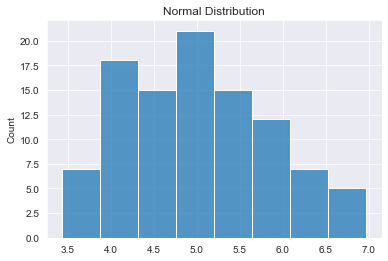

In [27]:
# First, let's create a histogram using the array norm which we had created above
sns.set_style("darkgrid")
sns.histplot(norm).set_title("Normal Distribution");

Now, let's plot the same data but using the KDE - kernal density estimation which is a useful tool in visualing normal distributions. It smooths out the curves by estimating all of the values in between.

Information on how to creat KDE plot with seaborn can be found https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Text(0.5, 1.0, 'Normal Distribution with KDE')

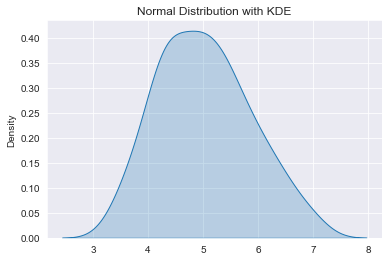

In [28]:
sns.kdeplot(data=norm, fill=True).set_title('Normal Distribution with KDE')

From the example above we can see that the bell shape curve of our plot isn't perfect, we can improve that by choosing the higher size of the data sample. To see the diffrence that **size** parameter makes we going to look at the data sample between 10 and 1,000,000. We can use the default paramters of mean = 0 and standart deviation = 1.

In [29]:
a = rng.standard_normal(10)
b = rng.standard_normal(100)
c = rng.standard_normal(1000)
d = rng.standard_normal(10000)
e = rng.standard_normal(100000)
f = rng.standard_normal(1000000)

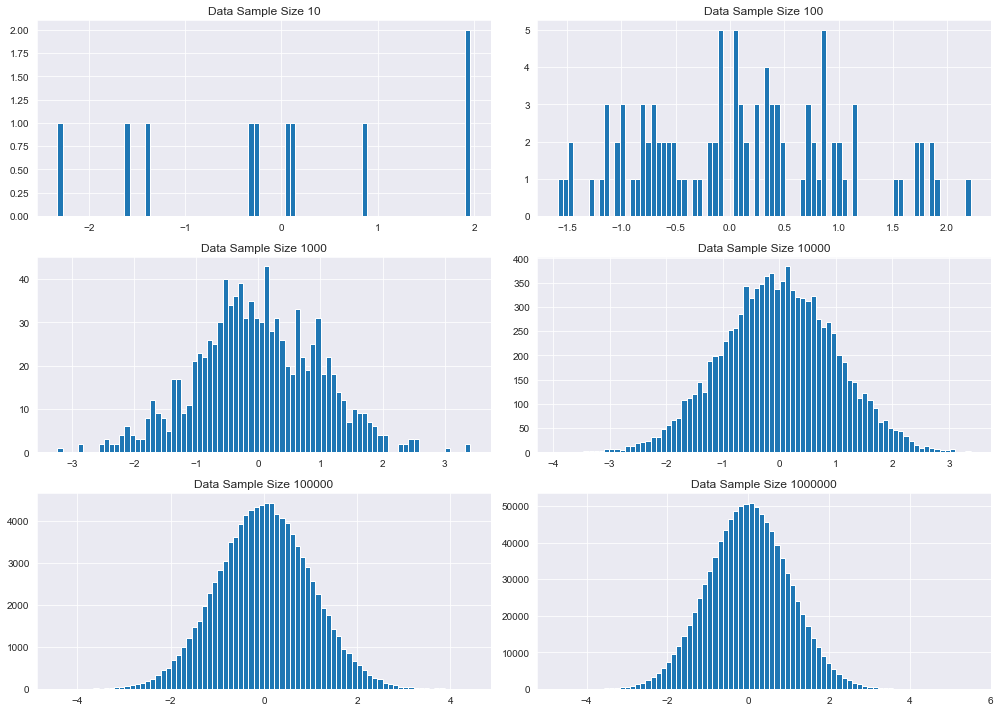

In [30]:
# creating 3 rows and 2 columns of plots
fig, axs = plt.subplots(3,2,figsize=(14,10))
# axs[0,0] etc. specifies location of the plot on the grid, 
# we can select the number of bins to see more detailed distribution
axs[0,0].hist(a, bins=80)
axs[0,0].set_title('Data Sample Size 10')
axs[0,1].hist(b, bins=80)
axs[0,1].set_title('Data Sample Size 100')
axs[1,0].hist(c, bins=80)
axs[1,0].set_title('Data Sample Size 1000')
axs[1,1].hist(d, bins=80)
axs[1,1].set_title('Data Sample Size 10000')
axs[2,0].hist(e, bins=80)
axs[2,0].set_title('Data Sample Size 100000')
axs[2,1].hist(f, bins=80)
axs[2,1].set_title('Data Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()


We can see that the last plot which has size = 1,000,000 has a perfect bell shape curve.

Now we can compare the plots with different means and standard deviations.

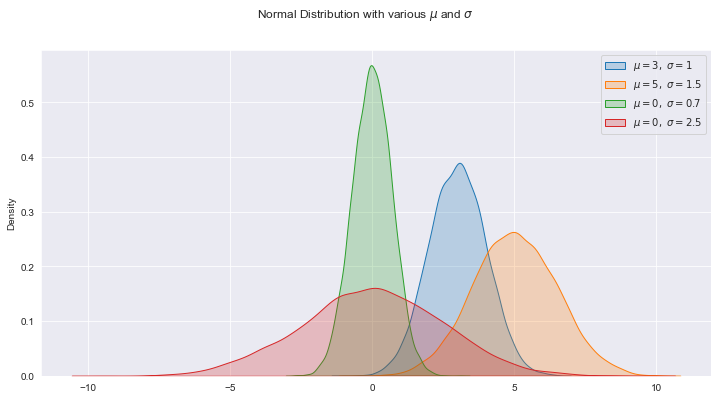

In [31]:
# Specifiyng loc, scale and size attributes
loc,scale,size = 3,1,10000
# Generating four random datasets specifying loc(mean) and scale(standard deviation)
ds1 = np.random.normal(loc,scale,size)
ds2 = np.random.normal(loc+2, scale+0.5,size)
ds3 = np.random.normal(loc-3,scale-0.3,size)
ds4 = np.random.normal(loc-3,scale+1.5,size)

# setting size of the figure
plt.figure(figsize=(12,6))  
# using seaborn kdeplot function to plot 
sns.kdeplot(ds1,fill=True,label="$\mu=3,\ \sigma=1$")
sns.kdeplot(ds2,fill=True, label ="$\mu=5,\ \sigma=1.5$")
sns.kdeplot(ds3,fill=True, label="$\mu=0,\ \sigma=0.7$")
sns.kdeplot(ds4,fill=True, label ="$\mu=0,\ \sigma=2.5$")
plt.legend()
plt.suptitle('Normal Distribution with various $\mu$ and $\sigma$')
plt.show()

The plot above demonstrate the bell-shaped nature of the normal distributions. When we changing the loc parameter it moves the curve along the X-axis while if we changing the scale parameter it either tightens or spreads out the width of the distribution along the X-axis.The curves never cross the x-axis, they continue to infinity in both directions of the mean. However the chances of observing values more than 3 standard deviations from the centre or mean of the curve is very small.

There is an [Empirical rule](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/empirical-rule-2/) for the Normal Distribution according to which 68% of the values under the curve fall between -1 and +1 standard deviations from the mean, 95% of the values fall within two standard deviations from the mean and 99.7% within 3 standard deviations. This rule applies no matter what the mean and standard deviations are. 

## 3.2 Uniform Distribution
***

The uniform distribution is a symmetric probability distribution where all outcomes have an equal likelihood of occurring. All values in the distribution have a constant probability, making them uniformly distributed. This distribution is also known as the rectangular distribution because of its shape in probability distribution plots.

Examples of the uniform distribution can be: rolling dice and coin tosses; the probability of drawing any card from a deck of cards. Random number generators use the uniform distribution because no number should be more common than other numbers, there is no skew in a uniform distribution like there is in other distributions.

Numpy has [`numpy.random.uniform(low=0.0, high=1.0, size=None)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function produces value within the given interval which is equally likely to be drawn by uniform.

Let's have a look at a few examples:

In [32]:
# if no parameters specified returns a floating point number in the interval [0,1)
rng.uniform()

0.8810887096990916

If only one value is provided, it will be considered as the upper limit (non-inclusive)

In [33]:
# returns a floating point number between 0.0 and 7.0
rng.uniform(7)

3.3693942579361984

In [34]:
# returns a floating point number in the interval [5,10)
rng.uniform(5,10)

6.988521627658415

We can also create multiple values if we use size paraeter or create a 2D array.

In [35]:
rng.uniform(5, 15, size=(4, 3))

array([[ 5.85423081, 10.80726078,  8.63974344],
       [ 5.53218819, 13.09888228, 14.46761821],
       [13.90431365, 14.29063404, 11.9191995 ],
       [ 9.45951367, 11.43500746,  7.00900168]])

To visualize this, we can display results on the grid plot, lets use 1000 values between 5 and 15

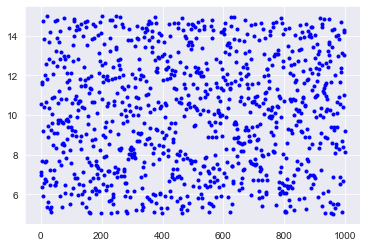

In [37]:
plt.plot(rng.uniform(5, 15, size=1000), 'b.')

britannica - https://www.britannica.com/topic/normal-distribution
Wiki - https://en.wikipedia.org/wiki/Normal_distribution
statisticsbyjim - https://statisticsbyjim.com/basics/normal-distribution/